The following additional libraries are needed to run this
notebook. Note that running on Colab is experimental, please report a Github
issue if you have any problem.

In [ ]:
!pip install d2l==0.16.3


# Eigendecompositions
:label:`sec_eigendecompositions`

Eigenvalues are often one of the most useful notions 
we will encounter when studying linear algebra, 
however, as a beginner, it is easy to overlook their importance.
Below, we introduce eigendecomposition and 
try to convey some sense of just why it is so important. 

Suppose that we have a matrix $A$ with the following entries:

$$
\mathbf{A} = \begin{bmatrix}
2 & 0 \\
0 & -1
\end{bmatrix}.
$$

If we apply $A$ to any vector $\mathbf{v} = [x, y]^\top$, 
we obtain a vector $\mathbf{A}\mathbf{v} = [2x, -y]^\top$.
This has an intuitive interpretation:
stretch the vector to be twice as wide in the $x$-direction,
and then flip it in the $y$-direction.

However, there are *some* vectors for which something remains unchanged.
Namely $[1, 0]^\top$ gets sent to $[2, 0]^\top$
and $[0, 1]^\top$ gets sent to $[0, -1]^\top$.
These vectors are still in the same line,
and the only modification is that the matrix stretches them
by a factor of $2$ and $-1$ respectively.
We call such vectors *eigenvectors*
and the factor they are stretched by *eigenvalues*.

In general, if we can find a number $\lambda$ 
and a vector $\mathbf{v}$ such that 

$$
\mathbf{A}\mathbf{v} = \lambda \mathbf{v}.
$$

We say that $\mathbf{v}$ is an eigenvector for $A$ and $\lambda$ is an eigenvalue.

## Finding Eigenvalues
Let us figure out how to find them. By subtracting off the $\lambda \mathbf{v}$ from both sides,
and then factoring out the vector,
we see the above is equivalent to:

$$(\mathbf{A} - \lambda \mathbf{I})\mathbf{v} = 0.$$
:eqlabel:`eq_eigvalue_der`

For :eqref:`eq_eigvalue_der` to happen, we see that $(\mathbf{A} - \lambda \mathbf{I})$ 
must compress some direction down to zero, 
hence it is not invertible, and thus the determinant is zero.
Thus, we can find the *eigenvalues* 
by finding for what $\lambda$ is $\det(\mathbf{A}-\lambda \mathbf{I}) = 0$.
Once we find the eigenvalues, we can solve 
$\mathbf{A}\mathbf{v} = \lambda \mathbf{v}$ 
to find the associated *eigenvector(s)*.

### An Example
Let us see this with a more challenging matrix

$$
\mathbf{A} = \begin{bmatrix}
2 & 1\\
2 & 3 
\end{bmatrix}.
$$

If we consider $\det(\mathbf{A}-\lambda \mathbf{I}) = 0$, 
we see this is equivalent to the polynomial equation
$0 = (2-\lambda)(3-\lambda)-2 = (4-\lambda)(1-\lambda)$.
Thus, two eigenvalues are $4$ and $1$.
To find the associated vectors, we then need to solve

$$
\begin{bmatrix}
2 & 1\\
2 & 3 
\end{bmatrix}\begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix}x \\ y\end{bmatrix}  \; \text{and} \;
\begin{bmatrix}
2 & 1\\
2 & 3 
\end{bmatrix}\begin{bmatrix}x \\ y\end{bmatrix}  = \begin{bmatrix}4x \\ 4y\end{bmatrix} .
$$

We can solve this with the vectors $[1, -1]^\top$ and $[1, 2]^\top$ respectively.

We can check this in code using the built-in `numpy.linalg.eig` routine.


In [1]:
%matplotlib inline
import tensorflow as tf
from IPython import display
from d2l import tensorflow as d2l

tf.linalg.eig(tf.constant([[2, 1], [2, 3]], dtype=tf.float64))


(<tf.Tensor: shape=(2,), dtype=complex128, numpy=array([1.+0.j, 4.+0.j])>,
 <tf.Tensor: shape=(2, 2), dtype=complex128, numpy=
 array([[-0.70710678+0.j, -0.4472136 +0.j],
        [ 0.70710678+0.j, -0.89442719+0.j]])>)

Note that `numpy` normalizes the eigenvectors to be of length one,
whereas we took ours to be of arbitrary length.
Additionally, the choice of sign is arbitrary.
However, the vectors computed are parallel 
to the ones we found by hand with the same eigenvalues.

## Decomposing Matrices
Let us continue the previous example one step further.  Let

$$
\mathbf{W} = \begin{bmatrix}
1 & 1 \\
-1 & 2
\end{bmatrix},
$$

be the matrix where the columns are the eigenvectors of the matrix $\mathbf{A}$. Let

$$
\boldsymbol{\Sigma} = \begin{bmatrix}
1 & 0 \\
0 & 4
\end{bmatrix},
$$

be the matrix with the associated eigenvalues on the diagonal.
Then the definition of eigenvalues and eigenvectors tells us that

$$
\mathbf{A}\mathbf{W} =\mathbf{W} \boldsymbol{\Sigma} .
$$

The matrix $W$ is invertible, so we may multiply both sides by $W^{-1}$ on the right,
we see that we may write

$$\mathbf{A} = \mathbf{W} \boldsymbol{\Sigma} \mathbf{W}^{-1}.$$
:eqlabel:`eq_eig_decomp`

In the next section we will see some nice consequences of this,
but for now we need only know that such a decomposition 
will exist as long as we can find a full collection 
of linearly independent eigenvectors (so that $W$ is invertible).

## Operations on Eigendecompositions
One nice thing about eigendecompositions :eqref:`eq_eig_decomp` is that 
we can write many operations we usually encounter cleanly 
in terms of the eigendecomposition. As a first example, consider:

$$
\mathbf{A}^n = \overbrace{\mathbf{A}\cdots \mathbf{A}}^{\text{$n$ times}} = \overbrace{(\mathbf{W}\boldsymbol{\Sigma} \mathbf{W}^{-1})\cdots(\mathbf{W}\boldsymbol{\Sigma} \mathbf{W}^{-1})}^{\text{$n$ times}} =  \mathbf{W}\overbrace{\boldsymbol{\Sigma}\cdots\boldsymbol{\Sigma}}^{\text{$n$ times}}\mathbf{W}^{-1} = \mathbf{W}\boldsymbol{\Sigma}^n \mathbf{W}^{-1}.
$$

This tells us that for any positive power of a matrix,
the eigendecomposition is obtained by just raising the eigenvalues to the same power.
The same can be shown for negative powers,
so if we want to invert a matrix we need only consider

$$
\mathbf{A}^{-1} = \mathbf{W}\boldsymbol{\Sigma}^{-1} \mathbf{W}^{-1},
$$

or in other words, just invert each eigenvalue.
This will work as long as each eigenvalue is non-zero,
so we see that invertible is the same as having no zero eigenvalues.  

Indeed, additional work can show that if $\lambda_1, \ldots, \lambda_n$ 
are the eigenvalues of a matrix, then the determinant of that matrix is

$$
\det(\mathbf{A}) = \lambda_1 \cdots \lambda_n,
$$

or the product of all the eigenvalues.
This makes sense intuitively because whatever stretching $\mathbf{W}$ does, 
$W^{-1}$ undoes it, so in the end the only stretching that happens is 
by multiplication by the diagonal matrix $\boldsymbol{\Sigma}$, 
which stretches volumes by the product of the diagonal elements.

Finally, recall that the rank was the maximum number 
of linearly independent columns of your matrix.
By examining the eigendecomposition closely,
we can see that the rank is the same 
as the number of non-zero eigenvalues of $\mathbf{A}$.

The examples could continue, but hopefully the point is clear:
eigendecomposition can simplify many linear-algebraic computations
and is a fundamental operation underlying many numerical algorithms
and much of the analysis that we do in linear algebra. 

## Eigendecompositions of Symmetric Matrices
It is not always possible to find enough linearly independent eigenvectors 
for the above process to work. For instance the matrix

$$
\mathbf{A} = \begin{bmatrix}
1 & 1 \\
0 & 1
\end{bmatrix},
$$

has only a single eigenvector, namely $(1, 0)^\top$. 
To handle such matrices, we require more advanced techniques 
than we can cover (such as the Jordan Normal Form, or Singular Value Decomposition).
We will often need to restrict our attention to those matrices 
where we can guarantee the existence of a full set of eigenvectors.

The most commonly encountered family are the *symmetric matrices*,
which are those matrices where $\mathbf{A} = \mathbf{A}^\top$. 
In this case, we may take $W$ to be an *orthogonal matrix*—a matrix whose columns are all length one vectors that are at right angles to one another, where 
$\mathbf{W}^\top = \mathbf{W}^{-1}$—and all the eigenvalues will be real.  
Thus, in this special case, we can write :eqref:`eq_eig_decomp` as

$$
\mathbf{A} = \mathbf{W}\boldsymbol{\Sigma}\mathbf{W}^\top .
$$

## Gershgorin Circle Theorem
Eigenvalues are often difficult to reason with intuitively.
If presented an arbitrary matrix, there is little that can be said
about what the eigenvalues are without computing them.
There is, however, one theorem that can make it easy to approximate well 
if the largest values are on the diagonal.

Let $\mathbf{A} = (a_{ij})$ be any square matrix ($n\times n$).
We will define $r_i = \sum_{j \neq i} |a_{ij}|$.
Let $\mathcal{D}_i$ represent the disc in the complex plane 
with center $a_{ii}$ radius $r_i$.
Then, every eigenvalue of $\mathbf{A}$ is contained in one of the $\mathcal{D}_i$.

This can be a bit to unpack, so let us look at an example.  
Consider the matrix:

$$
\mathbf{A} = \begin{bmatrix}
1.0 & 0.1 & 0.1 & 0.1 \\
0.1 & 3.0 & 0.2 & 0.3 \\
0.1 & 0.2 & 5.0 & 0.5 \\
0.1 & 0.3 & 0.5 & 9.0
\end{bmatrix}.
$$

We have $r_1 = 0.3$, $r_2 = 0.6$, $r_3 = 0.8$ and $r_4 = 0.9$.
The matrix is symmetric, so all eigenvalues are real.
This means that all of our eigenvalues will be in one of the ranges of 

$$[a_{11}-r_1, a_{11}+r_1] = [0.7, 1.3], $$

$$[a_{22}-r_2, a_{22}+r_2] = [2.4, 3.6], $$

$$[a_{33}-r_3, a_{33}+r_3] = [4.2, 5.8], $$

$$[a_{44}-r_4, a_{44}+r_4] = [8.1, 9.9]. $$


Performing the numerical computation shows 
that the eigenvalues are approximately $0.99$, $2.97$, $4.95$, $9.08$,
all comfortably inside the ranges provided.


In [2]:
A = tf.constant([[1.0, 0.1, 0.1, 0.1], [0.1, 3.0, 0.2, 0.3],
                 [0.1, 0.2, 5.0, 0.5], [0.1, 0.3, 0.5, 9.0]])

v, _ = tf.linalg.eigh(A)
v

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.99228525, 2.9734395 , 4.953943  , 9.080336  ], dtype=float32)>

In this way, eigenvalues can be approximated, 
and the approximations will be fairly accurate 
in the case that the diagonal is 
significantly larger than all the other elements.  

It is a small thing, but with a complex 
and subtle topic like eigendecomposition, 
it is good to get any intuitive grasp we can.

## A Useful Application: The Growth of Iterated Maps

Now that we understand what eigenvectors are in principle,
let us see how they can be used to provide a deep understanding 
of a problem central to neural network behavior: proper weight initialization. 

### Eigenvectors as Long Term Behavior

The full mathematical investigation of the initialization 
of deep neural networks is beyond the scope of the text, 
but we can see a toy version here to understand
how eigenvalues can help us see how these models work.
As we know, neural networks operate by interspersing layers 
of linear transformations with non-linear operations.
For simplicity here, we will assume that there is no non-linearity,
and that the transformation is a single repeated matrix operation $A$,
so that the output of our model is

$$
\mathbf{v}_{out} = \mathbf{A}\cdot \mathbf{A}\cdots \mathbf{A} \mathbf{v}_{in} = \mathbf{A}^N \mathbf{v}_{in}.
$$

When these models are initialized, $A$ is taken to be 
a random matrix with Gaussian entries, so let us make one of those. 
To be concrete, we start with a mean zero, variance one Gaussian distributed $5 \times 5$ matrix.


In [3]:
k = 5
A = tf.random.normal((k, k), dtype=tf.float64)
A

<tf.Tensor: shape=(5, 5), dtype=float64, numpy=
array([[ 0.25067719, -1.37680534,  0.65505493, -0.99741413, -0.23935027],
       [-2.23134495, -0.0341045 , -0.60785849, -0.76161684,  0.09740195],
       [ 0.45714403, -0.0585447 , -0.14743213, -2.39954665,  0.85543858],
       [-1.21991131,  0.21226906,  0.71730587, -0.17634297,  0.70778139],
       [ 1.452321  ,  0.18599562,  2.32583258, -0.93608568, -0.32859231]])>

### Behavior on Random Data
For simplicity in our toy model, 
we will assume that the data vector we feed in $\mathbf{v}_{in}$ 
is a random five dimensional Gaussian vector.
Let us think about what we want to have happen.
For context, lets think of a generic ML problem,
where we are trying to turn input data, like an image, into a prediction, 
like the probability the image is a picture of a cat.
If repeated application of $\mathbf{A}$ 
stretches a random vector out to be very long, 
then small changes in input will be amplified 
into large changes in output---tiny modifications of the input image
would lead to vastly different predictions.
This does not seem right!

On the flip side, if $\mathbf{A}$ shrinks random vectors to be shorter,
then after running through many layers, the vector will essentially shrink to nothing, 
and the output will not depend on the input. This is also clearly not right either!

We need to walk the narrow line between growth and decay 
to make sure that our output changes depending on our input, but not much!

Let us see what happens when we repeatedly multiply our matrix $\mathbf{A}$ 
against a random input vector, and keep track of the norm.


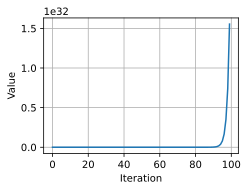

In [4]:
# Calculate the sequence of norms after repeatedly applying `A`
v_in = tf.random.normal((k, 1), dtype=tf.float64)

norm_list = [tf.norm(v_in).numpy()]
for i in range(1, 100):
    v_in = tf.matmul(A, v_in)
    norm_list.append(tf.norm(v_in).numpy())

d2l.plot(tf.range(0, 100), norm_list, 'Iteration', 'Value')

The norm is growing uncontrollably! 
Indeed if we take the list of quotients, we will see a pattern.


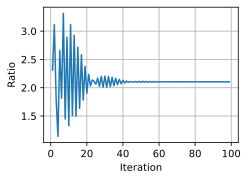

In [5]:
# Compute the scaling factor of the norms
norm_ratio_list = []
for i in range(1, 100):
    norm_ratio_list.append(norm_list[i] / norm_list[i - 1])

d2l.plot(tf.range(1, 100), norm_ratio_list, 'Iteration', 'Ratio')

If we look at the last portion of the above computation, 
we see that the random vector is stretched by a factor of `1.974459321485[...]`,
where the portion at the end shifts a little, 
but the stretching factor is stable.  

### Relating Back to Eigenvectors

We have seen that eigenvectors and eigenvalues correspond 
to the amount something is stretched, 
but that was for specific vectors, and specific stretches.
Let us take a look at what they are for $\mathbf{A}$.
A bit of a caveat here: it turns out that to see them all,
we will need to go to complex numbers.
You can think of these as stretches and rotations.
By taking the norm of the complex number
(square root of the sums of squares of real and imaginary parts)
we can measure that stretching factor. Let us also sort them.


In [6]:
# Compute the eigenvalues
eigs = tf.linalg.eigh(A)[0].numpy().tolist()
norm_eigs = [tf.abs(tf.constant(x, dtype=tf.float64)) for x in eigs]
norm_eigs.sort()
print(f'norms of eigenvalues: {norm_eigs}')

norms of eigenvalues: [<tf.Tensor: shape=(), dtype=float64, numpy=0.09317470710415798>, <tf.Tensor: shape=(), dtype=float64, numpy=1.5984882079584553>, <tf.Tensor: shape=(), dtype=float64, numpy=2.466697431862441>, <tf.Tensor: shape=(), dtype=float64, numpy=3.210923565376758>, <tf.Tensor: shape=(), dtype=float64, numpy=3.550163366836298>]


### An Observation

We see something a bit unexpected happening here: 
that number we identified before for the 
long term stretching of our matrix $\mathbf{A}$ 
applied to a random vector is *exactly* 
(accurate to thirteen decimal places!) 
the largest eigenvalue of $\mathbf{A}$.
This is clearly not a coincidence!

But, if we now think about what is happening geometrically,
this starts to make sense. Consider a random vector. 
This random vector points a little in every direction, 
so in particular, it points at least a little bit 
in the same direction as the eigenvector of $\mathbf{A}$
associated with the largest eigenvalue.
This is so important that it is called 
the *principle eigenvalue* and *principle eigenvector*.
After applying $\mathbf{A}$, our random vector 
gets stretched in every possible direction,
as is associated with every possible eigenvector,
but it is stretched most of all in the direction 
associated with this principle eigenvector.
What this means is that after apply in $A$, 
our random vector is longer, and points in a direction 
closer to being aligned with the principle eigenvector.
After applying the matrix many times, 
the alignment with the principle eigenvector becomes closer and closer until, 
for all practical purposes, our random vector has been transformed 
into the principle eigenvector!
Indeed this algorithm is the basis 
for what is known as the *power iteration*
for finding the largest eigenvalue and eigenvector of a matrix. For details see, for example, :cite:`Van-Loan.Golub.1983`.

### Fixing the Normalization

Now, from above discussions, we concluded 
that we do not want a random vector to be stretched or squished at all,
we would like random vectors to stay about the same size throughout the entire process.
To do so, we now rescale our matrix by this principle eigenvalue 
so that the largest eigenvalue is instead now just one.
Let us see what happens in this case.


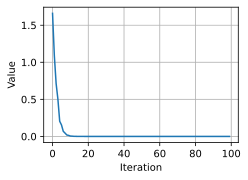

In [7]:
# Rescale the matrix `A`
A /= norm_eigs[-1]

# Do the same experiment again
v_in = tf.random.normal((k, 1), dtype=tf.float64)

norm_list = [tf.norm(v_in).numpy()]
for i in range(1, 100):
    v_in = tf.matmul(A, v_in)
    norm_list.append(tf.norm(v_in).numpy())

d2l.plot(tf.range(0, 100), norm_list, 'Iteration', 'Value')

We can also plot the ratio between consecutive norms as before and see that indeed it stabilizes.


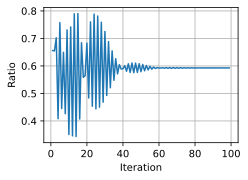

In [8]:
# Also plot the ratio
norm_ratio_list = []
for i in range(1, 100):
    norm_ratio_list.append(norm_list[i] / norm_list[i - 1])

d2l.plot(tf.range(1, 100), norm_ratio_list, 'Iteration', 'Ratio')

## Conclusions

We now see exactly what we hoped for!
After normalizing the matrices by the principle eigenvalue,
we see that the random data does not explode as before,
but rather eventually equilibrates to a specific value.
It would be nice to be able to do these things from first principles,
and it turns out that if we look deeply at the mathematics of it,
we can see that the largest eigenvalue 
of a large random matrix with independent mean zero,
variance one Gaussian entries is on average about $\sqrt{n}$,
or in our case $\sqrt{5} \approx 2.2$,
due to a fascinating fact known as the *circular law* :cite:`Ginibre.1965`.
The relationship between the eigenvalues (and a related object called singular values) of random matrices has been shown to have deep connections to proper initialization of neural networks as was discussed in :cite:`Pennington.Schoenholz.Ganguli.2017` and subsequent works.

## Summary
* Eigenvectors are vectors which are stretched by a matrix without changing direction.
* Eigenvalues are the amount that the eigenvectors are stretched by the application of the matrix.
* The eigendecomposition of a matrix can allow for many operations to be reduced to operations on the eigenvalues.
* The Gershgorin Circle Theorem can provide approximate values for the eigenvalues of a matrix.
* The behavior of iterated matrix powers depends primarily on the size of the largest eigenvalue.  This understanding has many applications in the theory of neural network initialization.

## Exercises
1. What are the eigenvalues and eigenvectors of
$$
\mathbf{A} = \begin{bmatrix}
2 & 1 \\
1 & 2
\end{bmatrix}?
$$
1.  What are the eigenvalues and eigenvectors of the following matrix, and what is strange about this example compared to the previous one?
$$
\mathbf{A} = \begin{bmatrix}
2 & 1 \\
0 & 2
\end{bmatrix}.
$$
1. Without computing the eigenvalues, is it possible that the smallest eigenvalue of the following matrix is less that $0.5$? *Note*: this problem can be done in your head.
$$
\mathbf{A} = \begin{bmatrix}
3.0 & 0.1 & 0.3 & 1.0 \\
0.1 & 1.0 & 0.1 & 0.2 \\
0.3 & 0.1 & 5.0 & 0.0 \\
1.0 & 0.2 & 0.0 & 1.8
\end{bmatrix}.
$$


[Discussions](https://discuss.d2l.ai/t/1087)
